In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Loading data

In [2]:
df = pd.read_csv("symptom_checker_sample_data.csv")

In [3]:
df.head()

,User_ID,Age,Gender,Symptoms,Duration (Days),Pre-existing Conditions,Severity,Suggested Action
0,U001,42,Female,Chest Pain,9,Asthma,Moderate,Consult General Physician
1,U002,62,Female,Sore Throat,13,Obesity,Severe,Emergency Room Visit
2,U003,41,Male,Sore Throat,10,Hypertension,Severe,Self-care
3,U004,62,Male,Sore Throat,2,None,Severe,Emergency Room Visit
4,U005,30,Female,Fever,5,Diabetes,Mild,Consult General Physician


In [22]:
df.isna().sum()

User_ID                    0
Age                        0
Gender                     0
Symptoms                   0
Duration (Days)            0
Pre-existing Conditions    0
Severity                   0
Suggested Action           0
dtype: int64

# Encode categorical variables

In [16]:
le = LabelEncoder()
categorical_cols = ["Gender", "Symptoms", "Pre-existing Conditions", "Severity", "Suggested Action"]

In [5]:
categorical_cols

['Gender',
 'Symptoms',
 'Pre-existing Conditions',
 'Severity',
 'Suggested Action']

In [6]:
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
# Splitting data into features and target
X = df.drop(columns=["User_ID", "Severity"])
y = df["Severity"]

# Train-test split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier

In [18]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Predictions

In [19]:
y_pred = rf_model.predict(X_test)

# Visualization

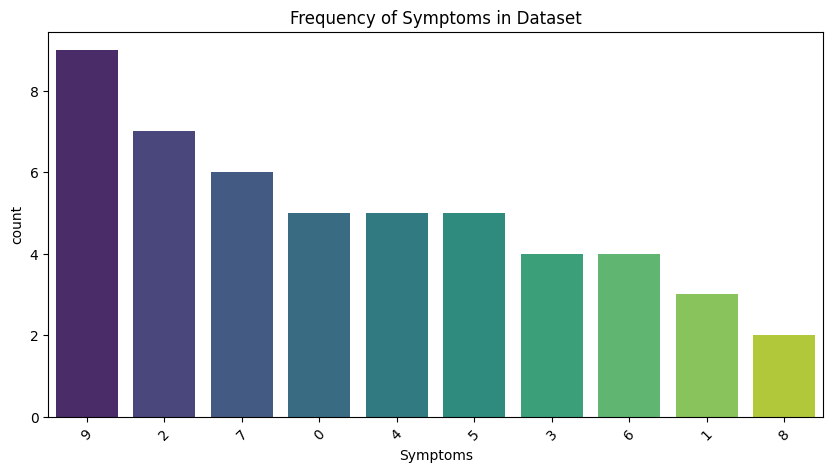

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Symptoms"], order=df["Symptoms"].value_counts().index, palette="viridis")
plt.xticks(rotation=45)
plt.title("Frequency of Symptoms in Dataset")
plt.show()

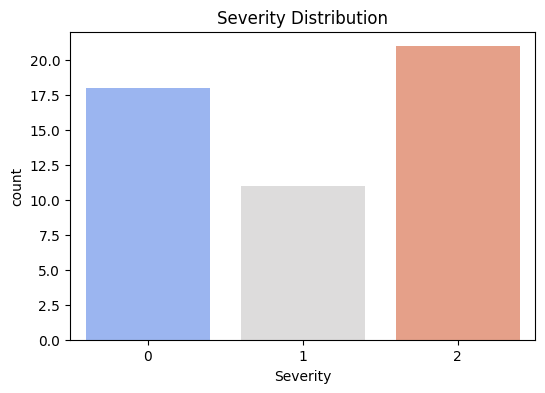

In [14]:
# Visualization - Severity Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["Severity"], palette="coolwarm")
plt.title("Severity Distribution")
plt.show()

# Model Evaluation

In [20]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [15]:
print("Model Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Model Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.00      0.00      0.00         1
           2       0.40      0.50      0.44         4

    accuracy                           0.50        10
   macro avg       0.38      0.37      0.37        10
weighted avg       0.53      0.50      0.51        10

